In [1]:
import spacy
import pandas as pd
import time
from tqdm import tqdm

### Data

In [2]:
with open('1g-word-1m-benchmark-r13output/training-monolingual.tokenized.shuffled/news.en-00001-of-00100') as sentences:
    sentences = sentences.read().split('\n')
    sentences.remove('')

In [3]:
len(sentences)

306068

### Parsing time evaluation of Spacy models

#### Case 1: en-core-web-sm

In [4]:
df = pd.DataFrame(columns=['num_sentences', 'time'])

In [5]:
# df_sm.append({'num_sentences': 400, 'time': 5}, ignore_index=True, inpl)

In [6]:
spacy.require_gpu()
nlp = spacy.load("en_core_web_md")

In [7]:
tic = time.time()
for size in tqdm(range(60000)):
    sentence = sentences[size]
    nlp(sentence)
    tac = time.time() - tic
    data = {'num_sentences': size, 'time': tac}
    df = df.append(data, ignore_index=True)

100%|██████████| 60000/60000 [14:25<00:00, 69.33it/s]


In [8]:
df.to_csv('log_md_2.csv', index=False)

In [9]:
from matplotlib import pyplot as plt

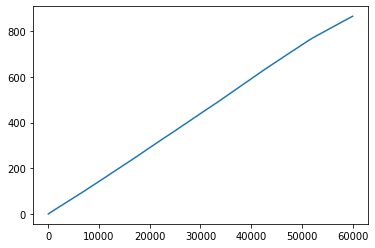

In [10]:
plt.plot(df.num_sentences.to_list(), df.time.to_list())
plt.show()